In [4]:
# Import resources and display image
import cv2
import matplotlib.pyplot as plt
import numpy as np 

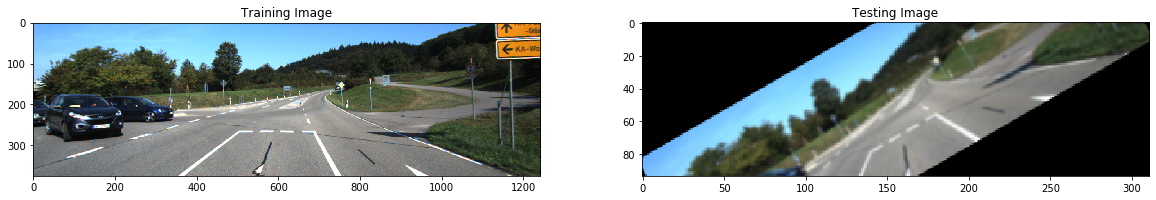

In [5]:
# Load the image
image = cv2.imread('./images/000001.png')

# Convert the image to RGB
train_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image by adding Scale Invariance 
test_image = cv2.pyrDown(train_image)
test_image = cv2.pyrDown(test_image)
num_rosws, num_cols = test_image.shape[:2]

# Rotation invariance
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2,num_rosws/2),30,1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols,
                                                         num_rosws))
test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display training image and testing image
fx, plots = plt.subplots(1, 2, figsize = (20,10))

plots[0].set_title("Training Image")
plots[0].imshow(train_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

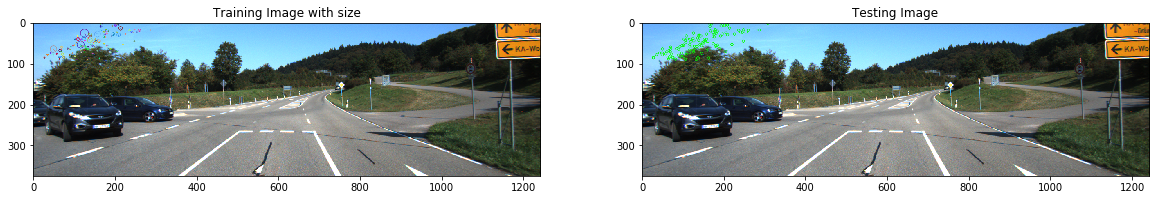

In [7]:
# Detect keypoints and create Descriptors

sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(test_gray,
                                                         None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(train_image)
keypoints_with_size = np.copy(train_image)

cv2.drawKeypoints(train_image, train_keypoints, keypoints_without_size, 
                 color = (0,255,0))
cv2.drawKeypoints(train_image, train_keypoints, keypoints_with_size,
                 flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display training image and testing image
fx, plots = plt.subplots(1,2, figsize=(20,10))

plots[0].set_title("Training Image with size")
plots[0].imshow(keypoints_with_size, cmap = 'gray')

plots[1].set_title("Training Image without size")
plots[1].imshow(keypoints_without_size, cmap='gray')

In [8]:
# Number of keypoints detected in the training image 
print("Number of keypoints detected in the training image", len(train_keypoints))
# Number of keypoints detected in the query image
print("Number of keypoints detected in query image", len(test_keypoints))

Number of keypoints detected in the training image 129
Number of keypoints detected in query image 129


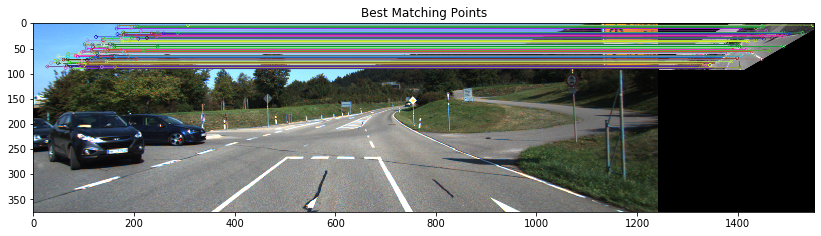

In [12]:
# Matching Keypoints

# Create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)
# Perform thr amtching between the SIFT descriptors of the training image and test image
matches = bf.match(train_descriptor, test_descriptor)
# The match with shorter distance are the ones desired
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(train_image, train_keypoints, test_gray, test_keypoints,
                        matches, test_gray, flags=2)
# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

In [13]:
# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))



Number of Matching Keypoints Between The Training and Query Images:  129
